In [1]:
import osmnx as ox 
ox.config(use_cache=True, log_console=True)

In [2]:
place = {'city':'San Francisco', 'state':'California', 'country':'USA'}
G = ox.graph_from_place(place, network_type='drive')

In [3]:
nodes, edges = ox.graph_to_gdfs(G)
edges['highway'].value_counts()

residential                    17823
tertiary                        3420
secondary                       2253
primary                         1731
unclassified                     423
trunk                            226
motorway_link                    141
motorway                          97
primary_link                      84
secondary_link                    68
tertiary_link                     32
trunk_link                        16
[unclassified, residential]       15
[residential, unclassified]       12
living_street                      6
[trunk, motorway]                  4
[tertiary, residential]            4
[primary_link, primary]            1
Name: highway, dtype: int64

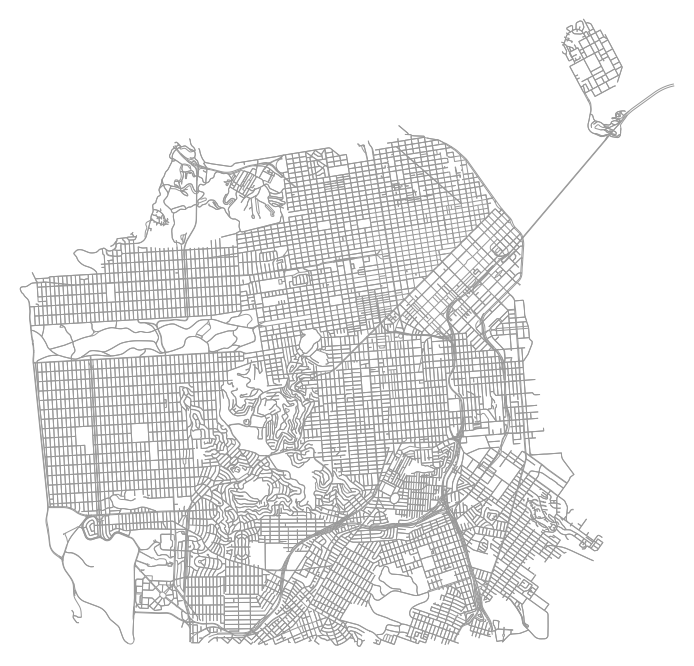

In [4]:
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0)

## filter out motorway edges

In [5]:
e = [(u, v, k) for u, v, k, d in G.edges(keys=True, data=True) if 'motorway' in d['highway']]

In [6]:
G.remove_edges_from(e)

In [7]:
nodes, edges = ox.graph_to_gdfs(G)
edges['highway'].value_counts()

residential                    17823
tertiary                        3420
secondary                       2253
primary                         1731
unclassified                     423
trunk                            226
primary_link                      84
secondary_link                    68
tertiary_link                     32
trunk_link                        16
[unclassified, residential]       15
[residential, unclassified]       12
living_street                      6
[tertiary, residential]            4
[primary_link, primary]            1
Name: highway, dtype: int64

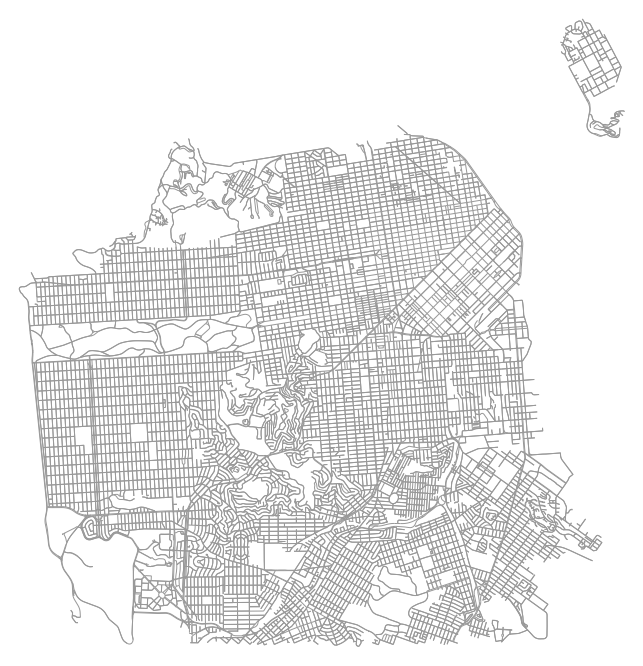

In [8]:
fig, ax = ox.plot_graph(G, fig_height=12, node_size=0)

## save graphs to disk

In [9]:
ox.save_graphml(G, filename='sf-directed-no-fwy.graphml')

In [10]:
nodes = ox.graph_to_gdfs(G, edges=False, node_geometry=False)
nodes.to_csv('data/sf-directed-nodes-no-fwy.csv', index=True, encoding='utf-8')

In [11]:
G_undir = ox.get_undirected(G)

In [12]:
ox.save_graphml(G_undir, filename='sf-undirected-no-fwy.graphml')

In [13]:
nodes = ox.graph_to_gdfs(G_undir, edges=False, node_geometry=False)
nodes.to_csv('data/sf-undirected-nodes-no-fwy.csv', index=True, encoding='utf-8')